In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('/content/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


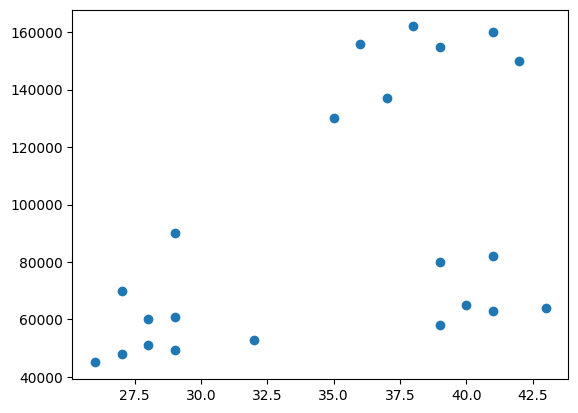

In [11]:
plt.scatter(df['Age'], df['Income($)'])

In [12]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [13]:
y_predicted = km.fit_predict(df[['Age','Income($)' ]])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [14]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


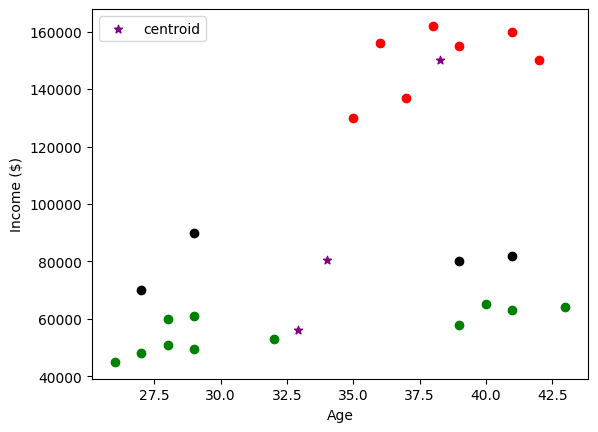

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [19]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']]) # Fit on a 2D array
df['Income($)'] = scaler.transform(df[['Income($)']]) # Transform a 2D array
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [21]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)' ]])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [22]:
df['cluster'] = y_predicted
df.drop('cluster', axis='columns')
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,2
5,Gautam,39,0.940171,2
6,David,41,0.982906,2
7,Andrea,38,1.000000,0
8,Brad,36,0.948718,0
9,Angelina,35,0.726496,0


AttributeError: PathCollection.set() got an unexpected keyword argument 'colors'

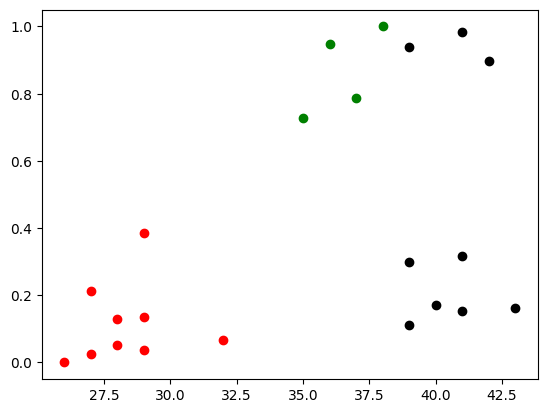

In [24]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], colors='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()